# Рисование 1 графика

In [46]:
import neuro_lib    # Импорт своей библиотеки для работы с Neuro обработкой файлов

file = r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_2\2020-11_05_17-19-52.txt"

param_str = [3.3, 68000] # Параметры структуры: V(В) пит., R(Ом) доп.

neuro_lib.replace (file)
neuro_lib.replace (file, '         ', '\t')
print (param_str)

[3.3, 68000]


In [47]:
import numpy as np
import pandas as pd

data = pd.read_csv(file, header=None, sep = "\t")
print (data, '\n')
#print (data[0], '\n')

                 0         1
0               10  0.011625
1             1011  0.010750
2             2011  0.011375
3             3011  0.011500
4             4011  0.010375
...            ...       ...
1067955  121987939  0.045250
1067956  121988940  0.045250
1067957  121989940  0.045250
1067958  121990940  0.045125
1067959  121991940  0.045125

[1067960 rows x 2 columns] 



C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


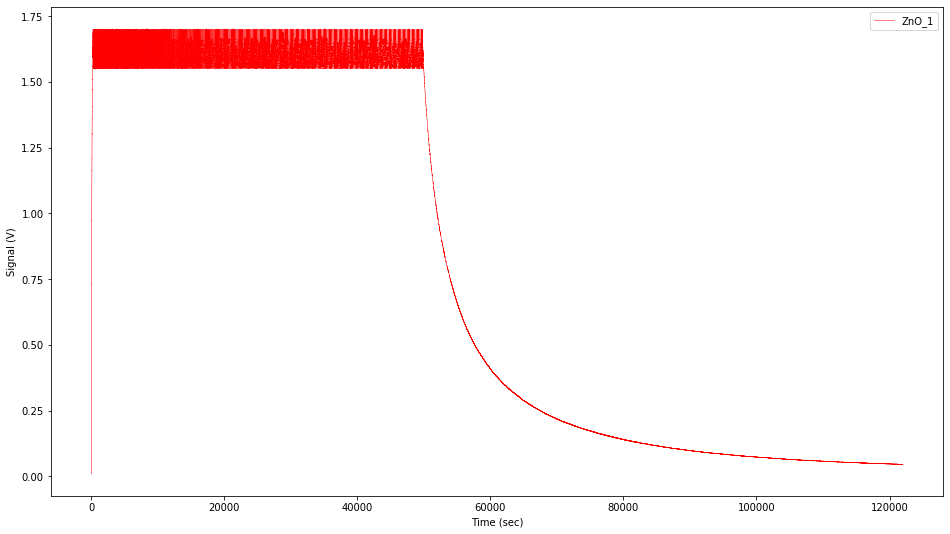

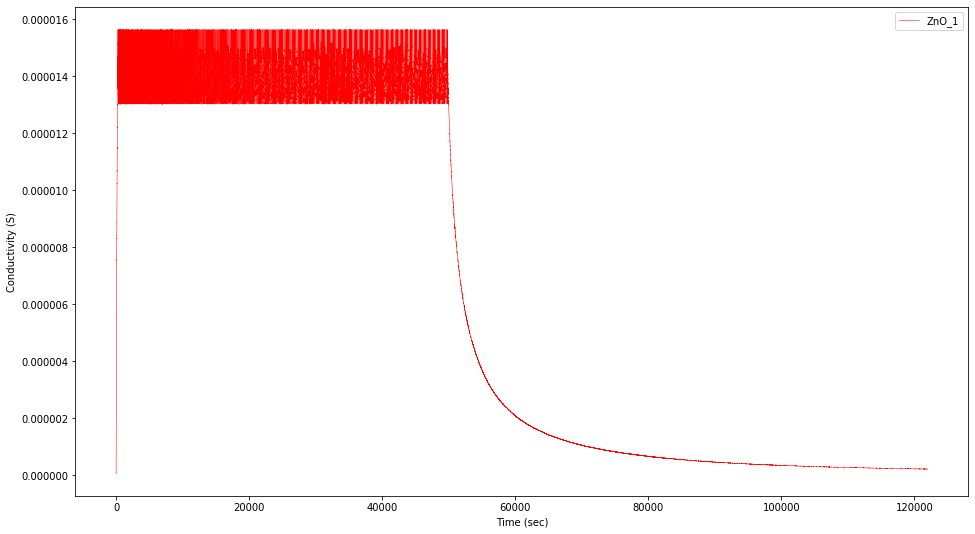

In [48]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16, 9)  # Размер картинок

x = data[0]/1000
y = data[1]

fig, ax = plt.subplots()
ax.set_facecolor('w') # установка фона графика

ax.plot(x, y, linewidth = 0.5, label="ZnO_1", color='r')
ax.legend()
ax.set_xlabel("Time (sec)")
ax.set_ylabel("Signal (V)")
#plt.title("Time dependence")
#ax.axis([0, 47000, 1.5, 2.25])

 ######################## 2 график ##########################
plt.rcParams['figure.figsize'] = (16, 9)  # Размер картинок

x = data[0]/1000
y = 1/((param_str[0] - data[1])*param_str[1]/data[1])

fig, ax = plt.subplots()
ax.set_facecolor('w') # установка фона графика

ax.plot(x, y, linewidth = 0.5, label="ZnO_1", color='r')
ax.legend()
ax.set_xlabel("Time (sec)")
ax.set_ylabel("Conductivity (S)")
#plt.title("Time dependence")
#ax.axis([0, 47000, 0.0000125, 0.0000275])
plt.show()

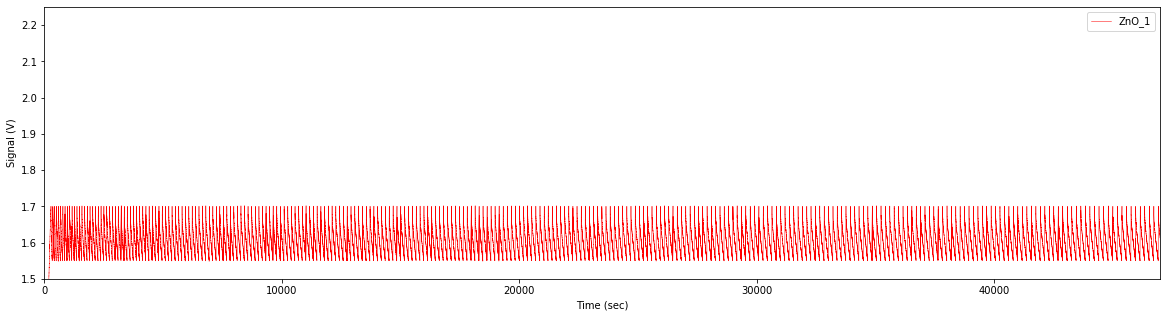

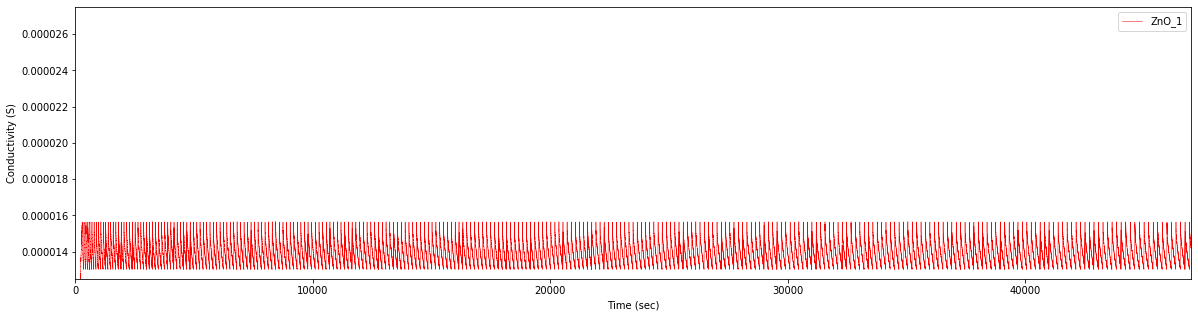

In [49]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 5)  # Размер картинок

x = data[0]/1000
y = data[1]

fig, ax = plt.subplots()
ax.set_facecolor('w') # установка фона графика

ax.plot(x, y, linewidth = 0.5, label="ZnO_1", color='r')
ax.legend()
ax.set_xlabel("Time (sec)")
ax.set_ylabel("Signal (V)")
#plt.title("Time dependence")
ax.axis([0, 47000, 1.5, 2.25])

 ######################## 2 график ##########################
plt.rcParams['figure.figsize'] = (20, 5)  # Размер картинок

x = data[0]/1000
y = 1/((param_str[0] - data[1])*param_str[1]/data[1])

fig, ax = plt.subplots()
ax.set_facecolor('w') # установка фона графика

ax.plot(x, y, linewidth = 0.5, label="ZnO_1", color='r')
ax.legend()
ax.set_xlabel("Time (sec)")
ax.set_ylabel("Conductivity (S)")
#plt.title("Time dependence")
ax.axis([0, 47000, 0.0000125, 0.0000275])
plt.show()

In [50]:
import numpy as np
a = np.array([[1,3]])
b = np.array([[1,2]])
a = np.vstack((a, b))
print (a)

[[1 3]
 [1 2]]


In [51]:
import numpy as np
import pandas as pd

def on_off_impulse(file): # функция, которая создает колонки с ON / OFF. В качестве параметра принимает имя файла

    f = open(file, 'r')
    line = f.readline()
    line_buf = line
    flag = 0

    #pd.options.display.max_colwidth = 1000
    res = pd.DataFrame(columns = ['N','on_start_t','on_start_V','on_end_t','on_end_V','off_start_t','off_start_V','off_end_t','off_end_V'])

    on_start = np.array([]) # создание массива ON
    i_on_start = 1

    on_end = np.array([])
    i_on_end = 1

    off_start = np.array([]) # создание массива OFF
    i_off_start = 1

    off_end = np.array([])
    i_off_end = 0

    while (line):
        if (line == "\n"):
            if (flag == 0):
                line_buf = line_buf.replace('\n', "") # удаление символа \n
                a = line_buf.split("\t")  # разбиение по \t
                res.loc[i_off_end, 'off_end_t'] = float(a[0])/1000
                res.loc[i_off_end, 'off_end_V'] = float(a[1])
                res.loc[i_off_end, 'N'] = i_off_end
                #print ('off', i_off_end, a, "\n")
                i_off_end += 1

                line = f.readline()
                if (line):
                    line = line.replace('\n', "")
                    b = line.split("\t")
                    res.loc[i_on_start, 'on_start_t'] = float(b[0])/1000
                    res.loc[i_on_start, 'on_start_V'] = float(b[1])
                    res.loc[i_on_start, 'N'] = i_on_start
                    #print ('on', i_on_start, b, "\n")
                    i_on_start += 1
                else:
                    break

                flag = 1 # переназначение FLAG
            else:
                if (flag == 1):
                    line_buf = line_buf.replace('\n', "")
                    a = line_buf.split("\t")
                    res.loc[i_on_end, 'on_end_t'] = float(a[0])/1000
                    res.loc[i_on_end, 'on_end_V'] = float(a[1])
                    res.loc[i_on_end, 'N'] = i_on_end
                    #print ('on', i_on_end, a, "\n")
                    i_on_end += 1

                    line = f.readline()
                    if (line):
                        line = line.replace('\n', "")
                        b = line.split("\t")
                        res.loc[i_off_start, 'off_start_t'] = float(b[0])/1000
                        res.loc[i_off_start, 'off_start_V'] = float(b[1])
                        res.loc[i_off_start, 'N'] = i_off_start
                        #print ('off', i_off_start, b, "\n")
                        i_off_start += 1
                    else:
                        break

                    flag = 0

        line_buf = line
        line = f.readline()
    f.close()
    return (res)

res = on_off_impulse(file)
#res = res.drop(0)
print (res.head().to_string()) # конструкция позволяет выводить много колонок // head() - число строчек

   N on_start_t on_start_V on_end_t on_end_V off_start_t off_start_V off_end_t off_end_V
0  0        NaN        NaN      NaN      NaN         NaN         NaN    10.012   0.01175
1  1     11.028    0.01525  285.791  1.70025     285.846       1.693   336.334   1.54963
2  2    336.399    1.56662  363.634  1.70013     363.689     1.69388   421.356   1.54987
3  3    421.422    1.56488  443.179  1.70025     443.236     1.69338   503.172   1.54975
4  4    503.239    1.56937  522.878  1.70037     522.935     1.69112   589.607   1.54838


   N on_start_t on_start_V on_end_t on_end_V off_start_t off_start_V off_end_t off_end_V
0  0        NaN        NaN      NaN      NaN         NaN         NaN    10.012   0.01175
1  1     11.028    0.01525  285.791  1.70025     285.846       1.693   336.334   1.54963
2  2    336.399    1.56662  363.634  1.70013     363.689     1.69388   421.356   1.54987
3  3    421.422    1.56488  443.179  1.70025     443.236     1.69338   503.172   1.54975
4  4    503.239    1.56937  522.878  1.70037     522.935     1.69112   589.607   1.54838


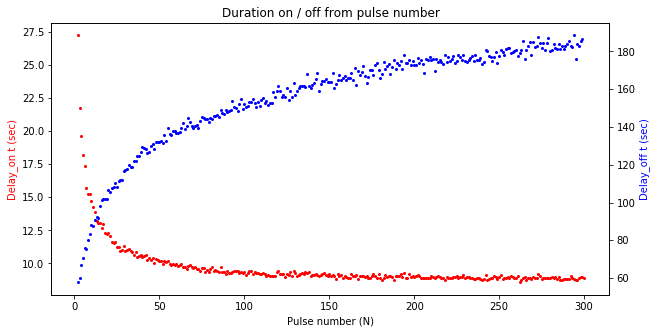

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print (res.head().to_string())

#plt.rcParams['figure.figsize'] = (16, 9)  # Размер картинок

x = res['N'].drop(1)
y_on = res['on_end_t'].drop(1) - res['on_start_t'].drop(1)
y_off = res['off_end_t'].drop(1) - res['off_start_t'].drop(1)

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 5)  # Размер картинок

fig, ax1 = plt.subplots()
ax1.set_facecolor('w') # установка фона графика
ax2 = ax1.twinx() # позволяет вывести 2 графика на 1

curve1 = ax1.scatter(x, y_on, s=4, label="on", color='r')
curve2 = ax2.scatter(x, y_off, s=4, label="off", color='b')
curves = [curve1, curve2]
#ax1.legend(curves, [curve.get_label() for curve in curves], facecolor="yellow") # ??? отображение легенды

ax1.set_xlabel("Pulse number (N)")
ax1.set_ylabel("Delay_on t (sec)", color = 'red')
ax2.set_ylabel("Delay_off t (sec)", color = 'blue')
plt.title("Duration on / off from pulse number")
#ax1.axis([0, 50, 0, 15])

plt.grid(False) # отключение сетки
plt.show()

# Рисование 2 графика

In [53]:
import neuro_lib    # Импорт своей библиотеки для работы с Neuro обработкой файлов

file = r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_2\2020-11_07_15-04-53.txt"

param_str = [3.3, 68000] # Параметры структуры: V(В) пит., R(Ом) доп.

neuro_lib.replace (file)
neuro_lib.replace (file, '         ', '\t')
print (param_str)

[3.3, 68000]


In [56]:
import neuro_lib_2
file = r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_2\2020-11_05_17-19-52.txt"
res_1 = neuro_lib_2.on_off_impulse(file)
print (res_1.head().to_string())
file = r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_2\2020-11_07_15-04-53.txt"
res_2 = neuro_lib_2.on_off_impulse(file)
print (res_2.head().to_string())

   N on_start_t on_start_V on_end_t on_end_V off_start_t off_start_V off_end_t off_end_V
0  0        NaN        NaN      NaN      NaN         NaN         NaN    10.012   0.01175
1  1     11.028    0.01525  285.791  1.70025     285.846       1.693   336.334   1.54963
2  2    336.399    1.56662  363.634  1.70013     363.689     1.69388   421.356   1.54987
3  3    421.422    1.56488  443.179  1.70025     443.236     1.69338   503.172   1.54975
4  4    503.239    1.56937  522.878  1.70037     522.935     1.69112   589.607   1.54838
   N on_start_t on_start_V on_end_t on_end_V off_start_t off_start_V off_end_t off_end_V
0  0        NaN        NaN      NaN      NaN         NaN         NaN    10.015  0.025875
1  1      11.03   0.031125  284.635  1.70087      284.69     1.69575   344.254   1.54975
2  2    344.321    1.56563  374.028  1.70063     374.083      1.6935    446.97   1.54987
3  3    447.036    1.56638  471.075  1.70025      471.13     1.69562   549.669   1.54963
4  4    549.736    1.

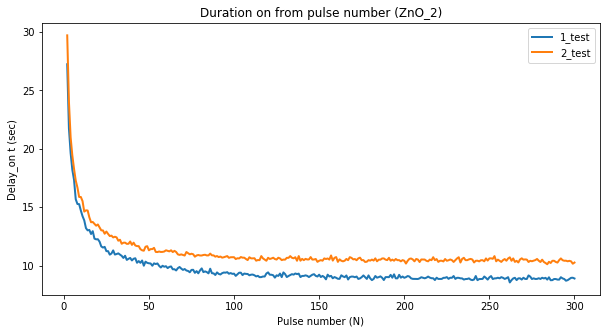

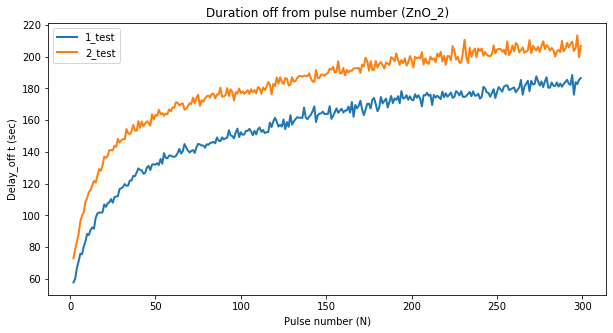

In [58]:
import numpy as np
import pandas as pd

x_1 = res_1['N'].drop(1)
y_on_1 = res_1['on_end_t'].drop(1) - res_1['on_start_t'].drop(1)
y_off_1 = res_1['off_end_t'].drop(1) - res_1['off_start_t'].drop(1)

x_2 = res_2['N'].drop(1)
y_on_2 = res_2['on_end_t'].drop(1) - res_2['on_start_t'].drop(1)
y_off_2 = res_2['off_end_t'].drop(1) - res_2['off_start_t'].drop(1)

plt.rcParams['figure.figsize'] = (10, 5)  # Размер картинок

fig, ax1 = plt.subplots()
ax1.plot(x_1, y_on_1, linewidth=2, label="1_test")
ax1.plot(x_2, y_on_2, linewidth=2, label="2_test")

ax1.set_xlabel("Pulse number (N)")
ax1.set_ylabel("Delay_on t (sec)")
plt.title("Duration on from pulse number (ZnO_2)")
ax1.legend()
# #ax1.axis([0, 50, 0, 15])
plt.show()

plt.rcParams['figure.figsize'] = (10, 5)  # Размер картинок

fig, ax2 = plt.subplots()
ax2.plot(x_1, y_off_1, linewidth=2, label="1_test")
ax2.plot(x_2, y_off_2, linewidth=2, label="2_test")

ax2.set_xlabel("Pulse number (N)")
ax2.set_ylabel("Delay_off t (sec)")
plt.title("Duration off from pulse number (ZnO_2)")
ax2.legend()
# #ax1.axis([0, 50, 0, 15])
plt.show()